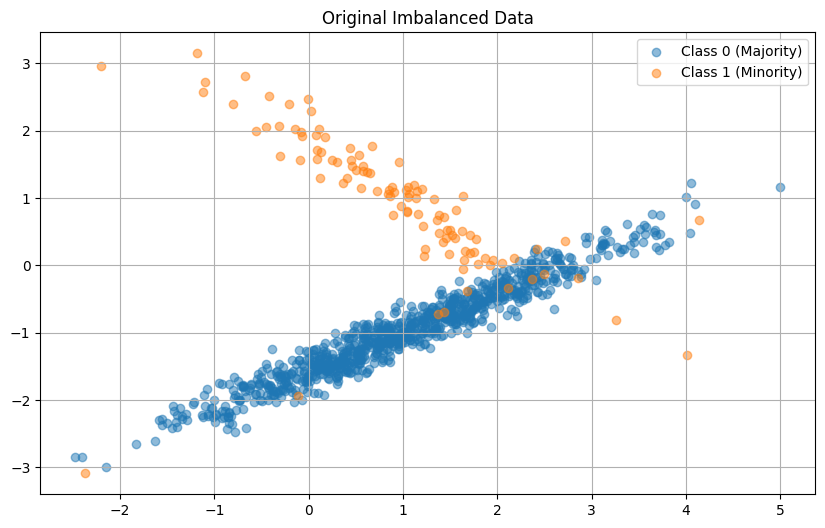


Class distribution for Original Imbalanced Data:
0    0.895
1    0.105
Name: proportion, dtype: float64


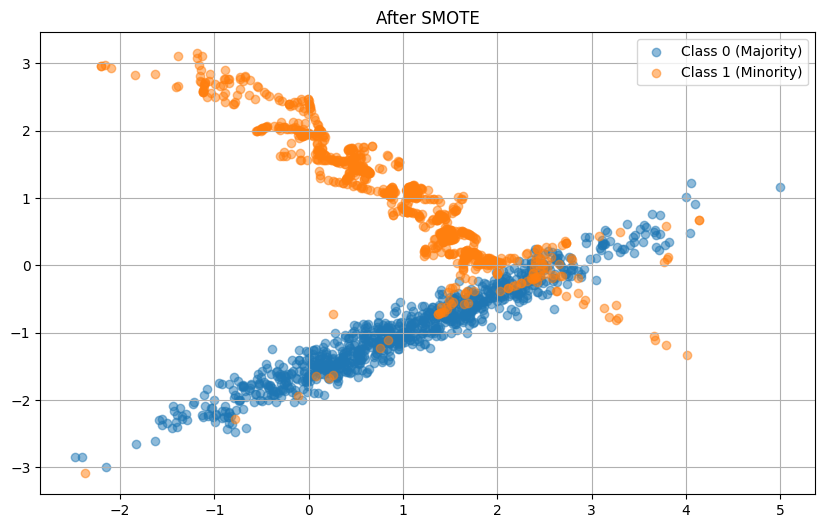


Class distribution for After SMOTE:
0    0.5
1    0.5
Name: proportion, dtype: float64


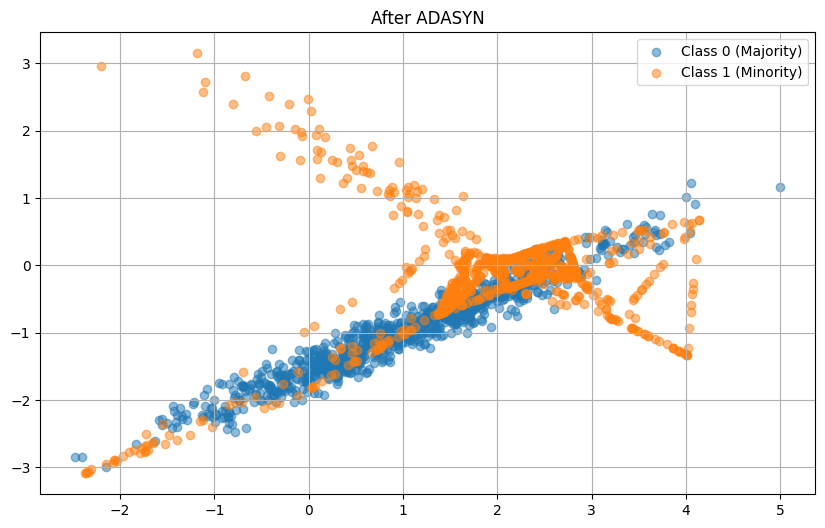


Class distribution for After ADASYN:
0    0.5
1    0.5
Name: proportion, dtype: float64

Number of samples in each dataset:
Original: 1000
SMOTE: 1790
ADASYN: 1790

Original class distribution:
0.0    0.9475
1.0    0.0525
Name: proportion, dtype: float64

SMOTE class distribution:
0.0    0.5
1.0    0.5
Name: proportion, dtype: float64

ADASYN class distribution:
1.0    0.501971
0.0    0.498029
Name: proportion, dtype: float64


In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE, ADASYN
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Create an imbalanced dataset for demonstration
def create_imbalanced_data(n_samples=1000, weights=(0.9, 0.1), n_features=2, n_clusters=1):
    """Create an imbalanced dataset for demonstration"""
    X, y = make_classification(
        n_samples=n_samples,
        n_features=n_features,
        n_redundant=0,
        n_clusters_per_class=n_clusters,
        weights=weights,
        random_state=42
    )
    return X, y

def plot_data_distribution(X, y, title):
    """Plot the distribution of classes"""
    plt.figure(figsize=(10, 6))
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label='Class 0 (Majority)', alpha=0.5)
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label='Class 1 (Minority)', alpha=0.5)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()
    print(f"\nClass distribution for {title}:")
    print(pd.Series(y).value_counts(normalize=True))

def compare_sampling_methods():
    # Generate imbalanced dataset
    X, y = create_imbalanced_data()
    
    # Initialize samplers
    smote = SMOTE(random_state=42)
    adasyn = ADASYN(random_state=42)
    
    # Apply sampling methods
    X_smote, y_smote = smote.fit_resample(X, y)
    X_adasyn, y_adasyn = adasyn.fit_resample(X, y)
    
    # Plot original and resampled distributions
    plot_data_distribution(X, y, "Original Imbalanced Data")
    plot_data_distribution(X_smote, y_smote, "After SMOTE")
    plot_data_distribution(X_adasyn, y_adasyn, "After ADASYN")
    
    # Compare the number of synthetic samples generated
    print("\nNumber of samples in each dataset:")
    print(f"Original: {len(y)}")
    print(f"SMOTE: {len(y_smote)}")
    print(f"ADASYN: {len(y_adasyn)}")

# Example with real-world scenario
def banking_example():
    """Example using a simplified banking dataset"""
    # Create synthetic banking data
    np.random.seed(42)
    n_samples = 1000
    
    # Generate features: age, income, credit_score
    age = np.random.normal(45, 15, n_samples)
    income = np.random.normal(50000, 20000, n_samples)
    credit_score = np.random.normal(700, 100, n_samples)
    
    X = np.column_stack([age, income, credit_score])
    
    # Generate imbalanced target (fraud detection)
    y = np.zeros(n_samples)
    # Create 5% fraud cases
    fraud_idx = np.random.choice(n_samples, size=int(0.05 * n_samples), replace=False)
    y[fraud_idx] = 1
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Apply SMOTE and ADASYN
    smote = SMOTE(random_state=42)
    adasyn = ADASYN(random_state=42)
    
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
    X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)
    
    print("\nOriginal class distribution:")
    print(pd.Series(y_train).value_counts(normalize=True))
    print("\nSMOTE class distribution:")
    print(pd.Series(y_train_smote).value_counts(normalize=True))
    print("\nADASYN class distribution:")
    print(pd.Series(y_train_adasyn).value_counts(normalize=True))

# Run the examples
compare_sampling_methods()
banking_example()

In [9]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

def smote_oversample(X, y, k_neighbors=5, minority_class=1, n_samples=None):
    """
    Implementation of SMOTE (Synthetic Minority Over-sampling Technique)
    
    Parameters:
    -----------
    X : array-like of shape (n_samples, n_features)
        Training data
    y : array-like of shape (n_samples,)
        Target values
    k_neighbors : int, default=5
        Number of nearest neighbors to use for generating synthetic samples
    minority_class : int, default=1
        Label of the minority class to oversample
    n_samples : int, optional
        Number of samples to generate. If None, generates enough samples
        to balance the dataset
        
    Returns:
    --------
    X_resampled : array-like
        Resampled feature matrix
    y_resampled : array-like
        Resampled target values
    """
    # Convert inputs to numpy arrays
    X = np.array(X)
    y = np.array(y)
    
    # Get minority class samples
    minority_indices = np.where(y == minority_class)[0]
    X_minority = X[minority_indices]
    
    # Get majority class samples
    majority_indices = np.where(y != minority_class)[0]
    X_majority = X[majority_indices]
    
    # Calculate number of samples to generate
    if n_samples is None:
        n_samples = len(majority_indices) - len(minority_indices)
    
    # Find k nearest neighbors for minority samples
    nn = NearestNeighbors(n_neighbors=k_neighbors)
    nn.fit(X_minority)
    
    # Generate synthetic samples
    synthetic_samples = []
    while len(synthetic_samples) < n_samples:
        # Randomly select a minority instance
        random_idx = np.random.randint(len(X_minority))
        point = X_minority[random_idx]
        
        # Find its k nearest neighbors
        distances, indices = nn.kneighbors([point])
        
        # Randomly select one of the k neighbors
        neighbor_idx = indices[0][np.random.randint(1, len(indices[0]))]
        neighbor = X_minority[neighbor_idx]
        
        # Generate synthetic sample
        alpha = np.random.random()
        synthetic_sample = point + alpha * (neighbor - point)
        synthetic_samples.append(synthetic_sample)
    
    # Combine original and synthetic samples
    X_resampled = np.vstack([X, synthetic_samples])
    y_resampled = np.hstack([y, np.array([minority_class] * len(synthetic_samples))])
    
    return X_resampled, y_resampled

# Example usage
def main():
    # Generate imbalanced dataset
    X, y = make_classification(
        n_samples=1000,
        n_features=4,
        n_redundant=0,
        n_clusters_per_class=1,
        weights=[0.9, 0.1],  # Make class 1 minority class (10% of samples)
        random_state=42
    )
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    
    # Print original class distribution
    print("Original class distribution in training set:")
    print(pd.Series(y_train).value_counts(normalize=True))
    
    # Apply SMOTE
    X_resampled, y_resampled = smote_oversample(X_train, y_train)
    
    # Print new class distribution
    print("\nClass distribution after SMOTE:")
    print(pd.Series(y_resampled).value_counts(normalize=True))
    
    # Train and evaluate model with original data
    clf_original = RandomForestClassifier(random_state=42)
    clf_original.fit(X_train, y_train)
    y_pred_original = clf_original.predict(X_test)
    
    print("\nClassification Report (Original Data):")
    print(classification_report(y_test, y_pred_original))
    
    # Train and evaluate model with SMOTE-resampled data
    clf_smote = RandomForestClassifier(random_state=42)
    clf_smote.fit(X_resampled, y_resampled)
    y_pred_smote = clf_smote.predict(X_test)
    
    print("\nClassification Report (After SMOTE):")
    print(classification_report(y_test, y_pred_smote))

if __name__ == "__main__":
    main()

Original class distribution in training set:
0    0.8925
1    0.1075
Name: proportion, dtype: float64

Class distribution after SMOTE:
0    0.5
1    0.5
Name: proportion, dtype: float64

Classification Report (Original Data):
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       182
           1       1.00      0.61      0.76        18

    accuracy                           0.96       200
   macro avg       0.98      0.81      0.87       200
weighted avg       0.97      0.96      0.96       200


Classification Report (After SMOTE):
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       182
           1       0.69      0.61      0.65        18

    accuracy                           0.94       200
   macro avg       0.82      0.79      0.81       200
weighted avg       0.94      0.94      0.94       200



In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
import time

def prepare_bank_data():
    """
    Load and prepare the UCI Bank Marketing dataset
    """
    # Load the dataset
    try:
        df = pd.read_csv('bank-additional-full.csv', sep=';')
    except FileNotFoundError:
        df = pd.read_csv('bank-full.csv', sep=';')
    
    # Separate features and target
    X = df.drop('y', axis=1)
    y = (df['y'] == 'yes').astype(int)
    
    # Identify categorical and numerical columns
    categorical_cols = X.select_dtypes(include=['object']).columns
    numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
    
    # Create copies to avoid warning messages
    X = X.copy()
    y = y.copy()
    
    # Encode categorical variables
    encoders = {}
    for column in categorical_cols:
        encoders[column] = LabelEncoder()
        X[column] = encoders[column].fit_transform(X[column])
    
    # Scale numerical features
    scaler = StandardScaler()
    X[numerical_cols] = scaler.fit_transform(X[numerical_cols])
    
    return X, y

def main():
    # Start timing
    start_time = time.time()
    
    print("1. Loading and preprocessing dataset...")
    X, y = prepare_bank_data()
    print(f"Dataset shape: {X.shape}")
    print(f"Class distribution:\n{pd.Series(y).value_counts(normalize=True)}")
    
    # Split the data
    print("\n2. Splitting data...")
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    
    # Apply SMOTE
    print("\n3. Applying SMOTE...")
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
    
    print(f"Original training set shape: {X_train.shape}")
    print(f"Resampled training set shape: {X_resampled.shape}")
    
    # Train and evaluate models
    print("\n4. Training and evaluating models...")
    
    # Original data
    print("Training model on original data...")
    clf_original = RandomForestClassifier(random_state=42, n_estimators=100, n_jobs=-1)
    clf_original.fit(X_train, y_train)
    y_pred_original = clf_original.predict(X_test)
    
    # SMOTE data
    print("Training model on SMOTE-resampled data...")
    clf_smote = RandomForestClassifier(random_state=42, n_estimators=100, n_jobs=-1)
    clf_smote.fit(X_resampled, y_resampled)
    y_pred_smote = clf_smote.predict(X_test)
    
    # Print results
    print("\nResults with original data:")
    print(classification_report(y_test, y_pred_original))
    
    print("\nResults with SMOTE:")
    print(classification_report(y_test, y_pred_smote))
    
    # Feature importance
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': clf_smote.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print("\nTop 5 Most Important Features:")
    print(feature_importance.head())
    
    # Print total execution time
    end_time = time.time()
    print(f"\nTotal execution time: {end_time - start_time:.2f} seconds")

if __name__ == "__main__":
    main()

1. Loading and preprocessing dataset...
Dataset shape: (41188, 20)
Class distribution:
y
0    0.887346
1    0.112654
Name: proportion, dtype: float64

2. Splitting data...

3. Applying SMOTE...
Original training set shape: (32950, 20)
Resampled training set shape: (58476, 20)

4. Training and evaluating models...
Training model on original data...
Training model on SMOTE-resampled data...

Results with original data:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      7310
           1       0.69      0.53      0.60       928

    accuracy                           0.92      8238
   macro avg       0.81      0.75      0.78      8238
weighted avg       0.91      0.92      0.92      8238


Results with SMOTE:
              precision    recall  f1-score   support

           0       0.96      0.93      0.95      7310
           1       0.58      0.73      0.65       928

    accuracy                           0.91      8238
   macro avg 


Original Data Class Distribution:
Counter({np.int64(0): 189, np.int64(1): 21})

Resampled Data Class Distribution:
Counter({np.int64(1): 190, np.int64(0): 189})

Classification Report (Original Data):
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        81
           1       1.00      0.78      0.88         9

    accuracy                           0.98        90
   macro avg       0.99      0.89      0.93        90
weighted avg       0.98      0.98      0.98        90


Classification Report (After ADASYN):
              precision    recall  f1-score   support

           0       0.99      0.98      0.98        81
           1       0.80      0.89      0.84         9

    accuracy                           0.97        90
   macro avg       0.89      0.93      0.91        90
weighted avg       0.97      0.97      0.97        90



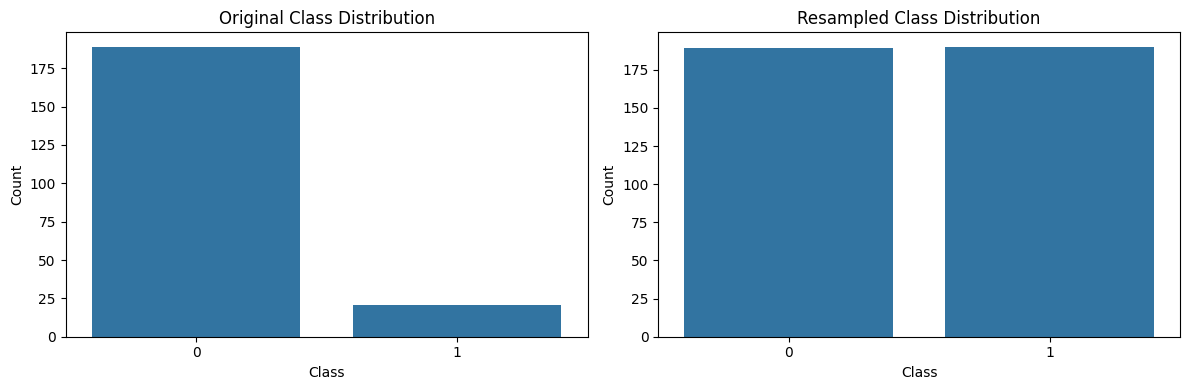

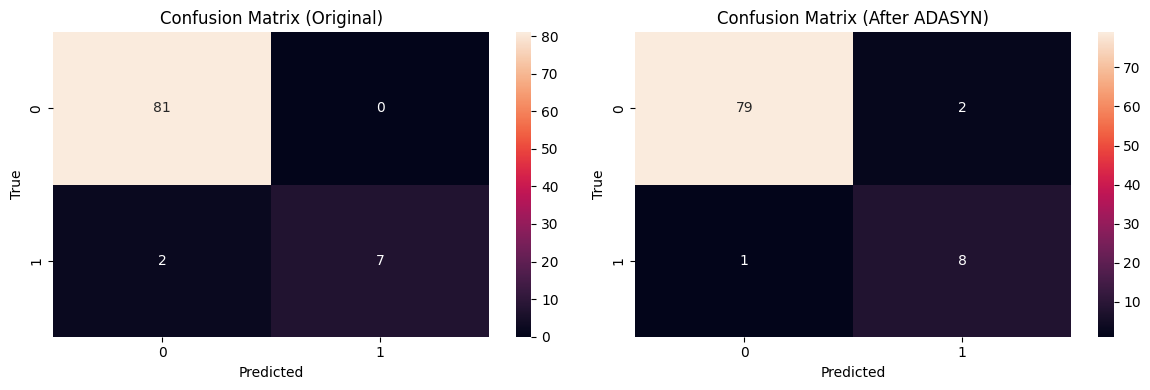

In [12]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

class ADASYN:
    """
    ADASYN (Adaptive Synthetic Sampling) implementation for handling imbalanced datasets.
    
    Parameters:
    -----------
    beta : float, optional (default=1.0)
        Desired balance level after generation of synthetic samples.
        If beta = 1, the algorithm will try to balance all classes to have the same size as the majority class.
    
    k : int, optional (default=5)
        Number of nearest neighbors to use for synthetic sample generation.
    
    k_neighbors : int, optional (default=5)
        Number of nearest neighbors to use for calculating density ratio.
    
    random_state : int, optional (default=None)
        Random state for reproducibility.
    """
    
    def __init__(self, beta=1.0, k=5, k_neighbors=5, random_state=None):
        self.beta = beta
        self.k = k
        self.k_neighbors = k_neighbors
        self.random_state = random_state
        
    def fit_resample(self, X, y):
        """
        Generate synthetic samples using ADASYN.
        
        Parameters:
        -----------
        X : array-like of shape (n_samples, n_features)
            Training data.
        
        y : array-like of shape (n_samples,)
            Target values.
            
        Returns:
        --------
        X_resampled : array-like of shape (n_samples_new, n_features)
            Resampled training data.
            
        y_resampled : array-like of shape (n_samples_new,)
            Resampled target values.
        """
        if self.random_state is not None:
            np.random.seed(self.random_state)
            
        # Convert inputs to numpy arrays
        X = np.array(X)
        y = np.array(y)
        
        # Find class distribution
        counter = Counter(y)
        majority_class = max(counter, key=counter.get)
        minority_class = min(counter, key=counter.get)
        
        # Calculate number of synthetic samples needed
        n_majority = counter[majority_class]
        n_minority = counter[minority_class]
        G = int((n_majority - n_minority) * self.beta)
        
        # Get minority class samples
        minority_indices = np.where(y == minority_class)[0]
        X_minority = X[minority_indices]
        
        # Calculate density ratio for each minority sample
        knn = KNeighborsClassifier(n_neighbors=self.k_neighbors + 1)
        knn.fit(X, y)
        
        density_ratio = []
        for x in X_minority:
            indices = knn.kneighbors(x.reshape(1, -1), return_distance=False)[0][1:]
            neighbors_labels = y[indices]
            ratio = np.sum(neighbors_labels != minority_class) / self.k_neighbors
            density_ratio.append(ratio)
            
        density_ratio = np.array(density_ratio)
        
        # Normalize density ratios
        if np.sum(density_ratio) == 0:
            density_ratio = np.ones_like(density_ratio) / len(density_ratio)
        else:
            density_ratio = density_ratio / np.sum(density_ratio)
            
        # Calculate number of synthetic samples for each minority instance
        n_synthetic = np.round(density_ratio * G).astype(int)
        
        # Generate synthetic samples
        synthetic_samples = []
        synthetic_labels = []
        
        for i, n in enumerate(n_synthetic):
            if n == 0:
                continue
                
            # Find k nearest minority class neighbors
            knn = KNeighborsClassifier(n_neighbors=self.k + 1)
            knn.fit(X_minority, np.ones(len(X_minority)))
            neighbors_indices = knn.kneighbors(X_minority[i].reshape(1, -1), 
                                             return_distance=False)[0][1:]
            
            # Generate synthetic samples
            for _ in range(n):
                neighbor_idx = np.random.choice(neighbors_indices)
                x = X_minority[i]
                x_neighbor = X_minority[neighbor_idx]
                
                # Generate synthetic sample
                alpha = np.random.random()
                synthetic_sample = x + alpha * (x_neighbor - x)
                
                synthetic_samples.append(synthetic_sample)
                synthetic_labels.append(minority_class)
        
        # Combine original and synthetic samples
        if len(synthetic_samples) > 0:
            X_resampled = np.vstack([X, np.array(synthetic_samples)])
            y_resampled = np.hstack([y, np.array(synthetic_labels)])
        else:
            X_resampled = X
            y_resampled = y
            
        return X_resampled, y_resampled

def plot_class_distribution(y_original, y_resampled):
    """Plot class distribution before and after resampling."""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    # Original distribution
    sns.countplot(x=y_original, ax=ax1)
    ax1.set_title('Original Class Distribution')
    ax1.set_xlabel('Class')
    ax1.set_ylabel('Count')
    
    # Resampled distribution
    sns.countplot(x=y_resampled, ax=ax2)
    ax2.set_title('Resampled Class Distribution')
    ax2.set_xlabel('Class')
    ax2.set_ylabel('Count')
    
    plt.tight_layout()
    plt.show()

def plot_confusion_matrices(y_test, y_pred_original, y_pred_resampled):
    """Plot confusion matrices for original and resampled data."""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    # Original confusion matrix
    cm_original = confusion_matrix(y_test, y_pred_original)
    sns.heatmap(cm_original, annot=True, fmt='d', ax=ax1)
    ax1.set_title('Confusion Matrix (Original)')
    ax1.set_xlabel('Predicted')
    ax1.set_ylabel('True')
    
    # Resampled confusion matrix
    cm_resampled = confusion_matrix(y_test, y_pred_resampled)
    sns.heatmap(cm_resampled, annot=True, fmt='d', ax=ax2)
    ax2.set_title('Confusion Matrix (After ADASYN)')
    ax2.set_xlabel('Predicted')
    ax2.set_ylabel('True')
    
    plt.tight_layout()
    plt.show()

def main():
    # Generate imbalanced dataset
    X, y = make_classification(
        n_samples=300,
        n_classes=2,
        weights=[0.9, 0.1],  # 90% majority class, 10% minority class
        n_features=2,  # Using 2 features for easy visualization
        n_redundant=0,
        n_clusters_per_class=1,
        random_state=42
    )
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42
    )
    
    # Initialize and apply ADASYN
    adasyn = ADASYN(beta=1.0, k=5, k_neighbors=5, random_state=42)
    X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)
    
    # Train and evaluate KNN classifier on original data
    knn_original = KNeighborsClassifier(n_neighbors=5)
    knn_original.fit(X_train, y_train)
    y_pred_original = knn_original.predict(X_test)
    
    # Train and evaluate KNN classifier on resampled data
    knn_resampled = KNeighborsClassifier(n_neighbors=5)
    knn_resampled.fit(X_resampled, y_resampled)
    y_pred_resampled = knn_resampled.predict(X_test)
    
    # Print results
    print("\nOriginal Data Class Distribution:")
    print(Counter(y_train))
    print("\nResampled Data Class Distribution:")
    print(Counter(y_resampled))
    
    print("\nClassification Report (Original Data):")
    print(classification_report(y_test, y_pred_original))
    
    print("\nClassification Report (After ADASYN):")
    print(classification_report(y_test, y_pred_resampled))
    
    # Plot results
    plot_class_distribution(y_train, y_resampled)
    plot_confusion_matrices(y_test, y_pred_original, y_pred_resampled)

if __name__ == "__main__":
    main()